**Name:** <span style="color:red">Bruno Álvarez</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2 (PART 2)
# Network percolation

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to `practical9_name1_name2.ipynb`, where `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this session we will study the percolation transition in random networks. To that end we will use the Python package `NetworkX`.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

First, use the **NetworkX** function `erdos_renyi_graph` to generate an Erdös-Renyi random network with $n=10000$ nodes and connection probability $p=0.0005$. Plot the degree distribution.

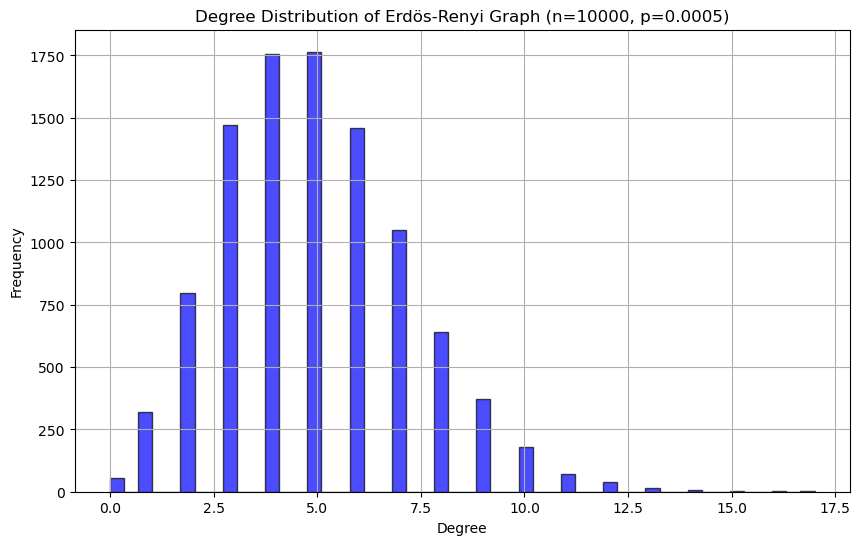

In [4]:
network = nx.erdos_renyi_graph(n = 10000, p = 0.0005)

degrees = []
for node in network.nodes():
    degrees.append(network.degree(node))


plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution of Erdös-Renyi Graph (n=10000, p=0.0005)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


---

<span style="color:red">Comment your result here</span>

---

Verify that the degree distribution obtained above matches a Poisson distribution with mean equal to the average degree of the network.

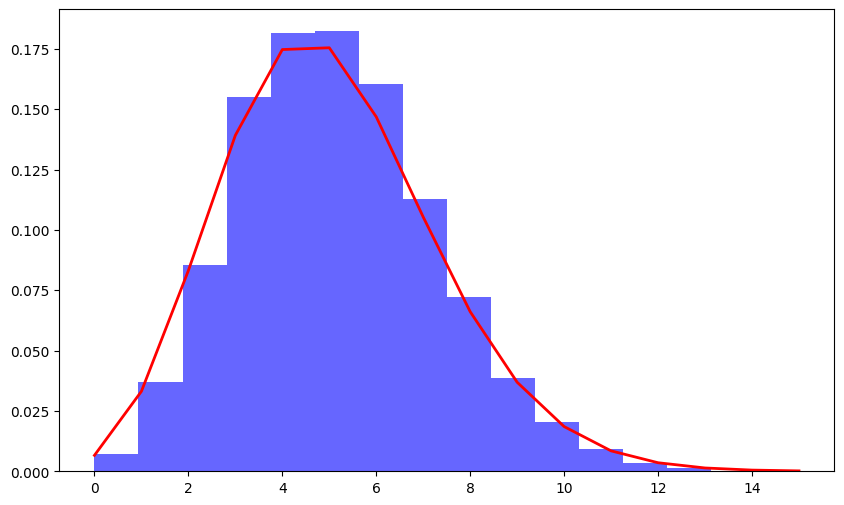

In [6]:
average_degree = np.mean(degrees)

pisoton_distribution = poisson.pmf(np.arange(max(degrees)+1), mu = average_degree)

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=16, density=True, alpha=0.6, color='blue', label='Degree Distribution')
plt.plot(np.arange(max(degrees)+1), pisoton_distribution, 'r-', lw=2, label=f'Poisson Distribution (mean={average_degree:.2f})')
plt.show()

We will now study the percolation transition discussed in class. To that end, generate an ensemble of Erdös-Renyi networks (e.g. 100 networks) with 1000 nodes each. Compute for each network the fraction of nodes that belong to the largest connected component, and calculate its average over the ensemble of networks with a given connection probability $p$. Repeat this calculation for a range of values of $p$ between $0$ and $10/n$, with $n$ being the number of nodes of the network.

In [5]:
n = 10000
p_val = np.linspace(0, 10/n, 10)
av_fracts = []

for p in p_val:
    
    fractions = []

    for x in range(100):
        
        network = nx.erdos_renyi_graph(n, p)

        largest = max(nx.connected_components(network), key = len)
        fraction = len(largest)
        fractions.append(fraction)

    av_fracts.append(np.mean(fractions))



KeyboardInterrupt: 

In [3]:
# Parameters
n = 1000  # Number of nodes
ensemble_size = 100  # Number of networks in the ensemble
p_values = np.linspace(0, 10/n, 20)  # Values of p from 0 to 10/n

# Store average fraction of nodes in the largest connected component for each p
average_lcc_fraction = []

# Loop over the range of p values
for p in p_values:
    lcc_fractions = []
    
    # For each p, generate ensemble_size networks and compute LCC for each
    for _ in range(ensemble_size):
        # Generate an Erdős-Rényi graph with n nodes and probability p
        G = nx.erdos_renyi_graph(n, p)
        
        # Get the largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        
        # Calculate the fraction of nodes in the largest connected component
        lcc_fraction = len(largest_cc) / n
        
        # Store the result
        lcc_fractions.append(lcc_fraction)
    
    # Compute the average fraction over the ensemble
    average_lcc_fraction.append(np.mean(lcc_fractions))

In [9]:
print(average_lcc_fraction)

[0.0010000000000000002, 0.012640000000000002, 0.13228, 0.62786, 0.8229000000000001, 0.9090900000000001, 0.95075, 0.9718800000000001, 0.9846300000000001, 0.9908600000000001, 0.99497, 0.9969499999999999, 0.9983, 0.9990499999999999, 0.99936, 0.99957, 0.99976, 0.9998599999999999, 0.9999600000000001, 0.9999600000000001]


Finally, plot the transition curve.

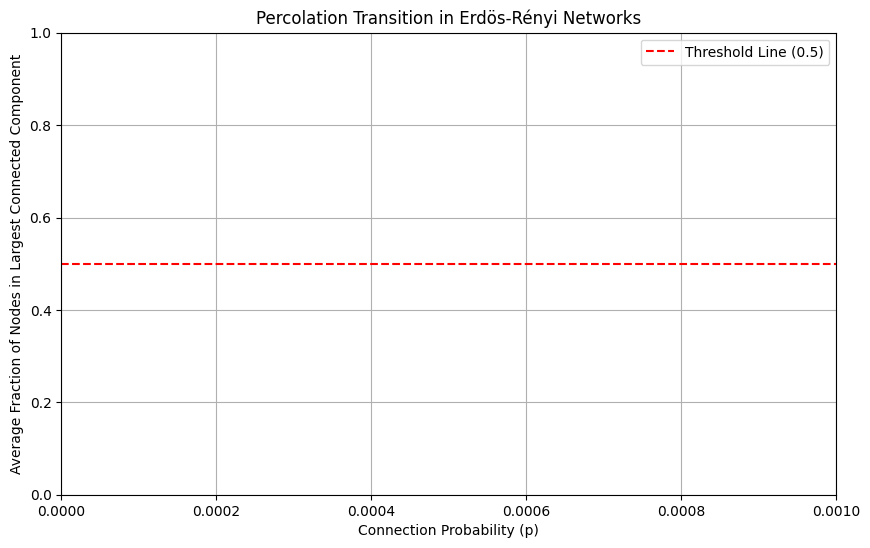

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(p_val, av_fracts, marker='o', linestyle='-', color='blue')
plt.title("Percolation Transition in Erdös-Rényi Networks")
plt.xlabel("Connection Probability (p)")
plt.ylabel("Average Fraction of Nodes in Largest Connected Component")
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 10/n)
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold Line (0.5)')  # Optional threshold line
plt.legend()
plt.show()

---

<span style="color:red">Comment your result here</span>

---